In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

**ID：每個客戶的ID**

**LIMIT_BAL限制餘額：以新台幣為單位的信用證金額（包括個人和家庭/補充信用證）**

**性別：性別（1 =男性，2 =女性）**

**教育教育：（1 =研究生院，2 =大學，3 =高中，4 =其他，5 =未知，6 =未知）**

**MARRIAGE婚姻：婚姻狀況（1 =已婚，2 =單身，3 =其他）**

**年齡：歲**

**Pay_0：2005年9月還款情況（-2 =無消費，-1 =全額支付，0 =循環信用證的使用（僅支付最低金額），1 =一個月的付款延遲，2 =延遲付款兩個月，…8 =民主黨月的付款延遲，9 =九個月及以上的付款延遲）**

**Pay_2：2005年8月還款情況（規模同上）**

**Pay_3：2005年7月還款情況（規模同上）**

**Pay_4：2005年6月還款情況（規模同上）**

**pay_5：2005年5月還款情況（規模同上）**

**Pay_6：2005年4月還款情況（規模同上）**

**BILL_AMT1匯票金額1：2005年9月對賬單金額（新台幣）**

**BILL_AMT2匯票金額2：2005年8月對賬單金額（新台幣）**

**BILL_AMT3匯票金額3：2005年7月對賬單金額（新台幣）**

**BILL_AMT4匯票金額4：2005年6月對賬單金額（新台幣）**

**BILL_AMT5匯票金額5：2005年5月對賬單金額（新台幣）**

**BILL_AMT6匯票金額6：2005年4月對賬單金額（新台幣）**

**PAY_AMT1支付金額1：2005年9月以前支付金額（新台幣）**

**PAY_AMT2支付金額2：2005年8月以前支付金額（新台幣）**

**PAY_AMT3支付金額3：2005年7月以前支付金額（新台幣）**

**PAY_AMT4支付金額4：2005年6月以前支付金額（新台幣）**

**PAY_AMT5支付金額5：2005年5月以前支付金額（新台幣）**

**PAY_AMT6支付金額6：2005年4月以前支付金額（新台幣）**

**是否逾期違約金。下個月：（1 =是，0 =否）**

In [132]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.columns = ['id','limit_bal','sex','education','marriage','age','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6','next_month']

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30000 non-null  int64  
 1   limit_bal   30000 non-null  float64
 2   sex         30000 non-null  int64  
 3   education   30000 non-null  int64  
 4   marriage    30000 non-null  int64  
 5   age         30000 non-null  int64  
 6   pay_1       30000 non-null  int64  
 7   pay_2       30000 non-null  int64  
 8   pay_3       30000 non-null  int64  
 9   pay_4       30000 non-null  int64  
 10  pay_5       30000 non-null  int64  
 11  pay_6       30000 non-null  int64  
 12  bill_amt1   30000 non-null  float64
 13  bill_amt2   30000 non-null  float64
 14  bill_amt3   30000 non-null  float64
 15  bill_amt4   30000 non-null  float64
 16  bill_amt5   30000 non-null  float64
 17  bill_amt6   30000 non-null  float64
 18  pay_amt1    30000 non-null  float64
 19  pay_amt2    30000 non-nul

In [134]:
#可看到幾乎沒有缺失值的情況
total_null = df.isnull().sum().sort_values(ascending=True)
total_null

id            0
pay_amt5      0
pay_amt4      0
pay_amt3      0
pay_amt2      0
pay_amt1      0
bill_amt6     0
bill_amt5     0
bill_amt4     0
bill_amt3     0
bill_amt2     0
pay_amt6      0
bill_amt1     0
pay_5         0
pay_4         0
pay_3         0
pay_2         0
pay_1         0
age           0
marriage      0
education     0
sex           0
limit_bal     0
pay_6         0
next_month    0
dtype: int64

In [135]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [136]:
print('sex' +str(sorted(df['sex'].unique())))
print('education'+str(sorted(df['education'].unique())))
print('marriage '+str(sorted(df['marriage'].unique())))
print('pay_1 '+str(sorted(df['pay_1'].unique())))
print('next_month '+str(sorted(df['next_month'].unique())))

sex[1, 2]
education[0, 1, 2, 3, 4, 5, 6]
marriage [0, 1, 2, 3]
pay_1 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
next_month [0, 1]


In [137]:
#由上述可看到education都被定義為其他將這些數字統一定義
#marriage 也有0的數字與原先給的資訊不同，將他調整為其他
#為何不昨刪除原因是此份檔案資料量本身就不大了，盡量能維持原狀不刪除就不會去做

In [138]:
#將educaiton 不存在原始資料的內容改成 0 統一視為其他
other_education = (df.education==0) |(df.education==4)|(df.education==5)|(df.education==6)
df.loc[other_education,'education']=0

In [139]:
#將marriage 不存在原始資料的內容改成 3 統一視為其他
df.loc[df.marriage==0,'marriage']=3

In [140]:
print('education'+str(sorted(df['education'].unique())))
print('marriage '+str(sorted(df['marriage'].unique())))

education[0, 1, 2, 3]
marriage [1, 2, 3]


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.779867,0.728486,0.0,1.00,2.0,2.00,3.0
marriage,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**默認中1的佔比為22％。**

**即下個月將有22％的客戶違約**

**信用卡限額limit_bal的總計為167484**

**客戶的平均年齡35**

**教育水平主要為研究生和大學生**。 

**對於Pay_1〜Pay_6，至少75％的客戶不處於付款延遲狀態。**

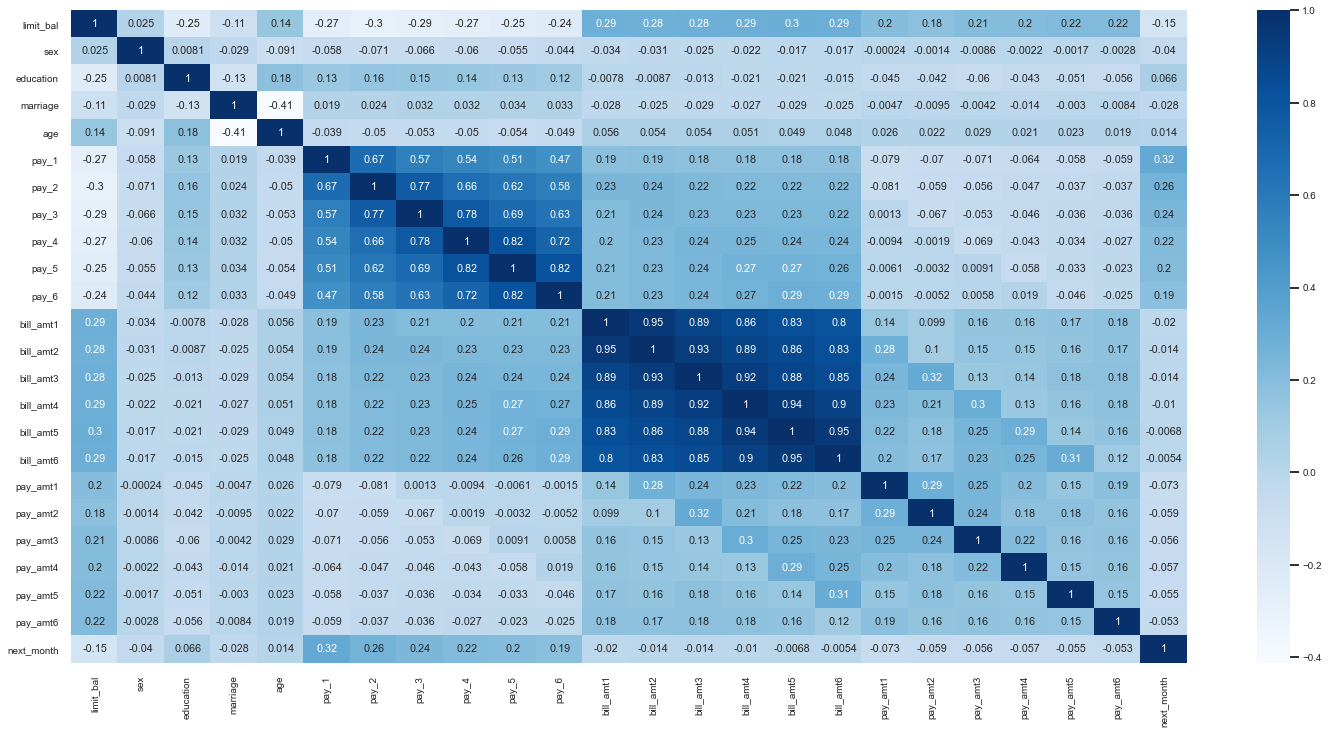

In [142]:
plt.figure(figsize=(25,12))#選擇圖片大小
sns.set_context('talk',font_scale=0.6)
sns.heatmap(df.iloc[:,1:].corr(),cmap='Blues',annot=True)

In [143]:
corr_matrix = df.corr()
corr_matrix['next_month'].sort_values(ascending=False)

next_month    1.000000
pay_1         0.324794
pay_2         0.263551
pay_3         0.235253
pay_4         0.216614
pay_5         0.204149
pay_6         0.186866
education     0.065685
age           0.013890
bill_amt6    -0.005372
bill_amt5    -0.006760
bill_amt4    -0.010156
id           -0.013952
bill_amt3    -0.014076
bill_amt2    -0.014193
bill_amt1    -0.019644
marriage     -0.027575
sex          -0.039961
pay_amt6     -0.053183
pay_amt5     -0.055124
pay_amt3     -0.056250
pay_amt4     -0.056827
pay_amt2     -0.058579
pay_amt1     -0.072929
limit_bal    -0.153520
Name: next_month, dtype: float64

**相關係數的意思是當一個變數變化時候另外一個變數會如何調整**

**在最後一行，我們查看因主要觀察變數Next_month與各個變量間的相關性**

**limit_bal與是否還款的相關係數為負數代表新用餘額程度越高違約率就越低**

**換句話說越有錢的人可能違約率就較低**

**再來觀察pay_0~pay_6的人觀察到相關係數幾乎占比最多，代表延遲付款約接近目前月份且較長時段沒有完全償付完全的人，違約比例越高**

[Text(0, 0, 'other'),
 Text(0, 0, 'graduate'),
 Text(0, 0, 'university'),
 Text(0, 0, 'high school')]

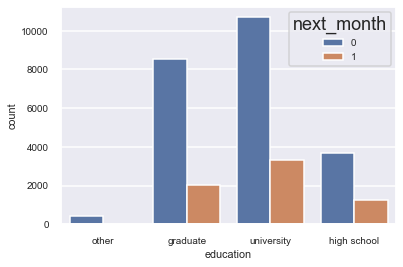

In [144]:
#觀察違約比例人的教育程度與婚姻狀況
educaction =  sns.countplot(x='education',hue='next_month',data=df)
educaction.set_xticklabels(['other','graduate','university','high school'])

[Text(0, 0, 'marriage'), Text(0, 0, 'single'), Text(0, 0, 'other')]

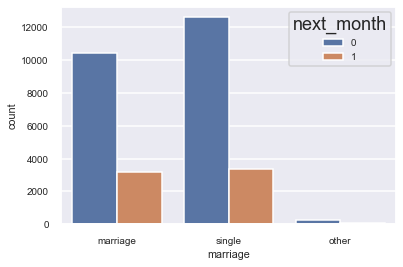

In [145]:
marriage = sns.countplot(x='marriage',hue='next_month',data=df)
marriage.set_xticklabels(['marriage','single','other'])

**觀察到大學生違約人數最高再來是研究生，最後是高中生**

**此外單身人用信用卡比率最高也能理解因為還沒有家庭花費機會可以多一些，但違約率兩者相當，可以說結婚的人違約機率更高**

**但在教育程度中不能因為，數值高就判定要看整體比率，不能單看數量**

In [146]:
education_0 =df.groupby(df['education'][df['next_month']==0]).size().reset_index(name='not_default') 
education_1 =df.groupby(df['education'][df['next_month']==1]).size().reset_index(name='default') 
total=df.groupby(df['education']).size().reset_index(name='total')
education_table = education_0.join(education_1['default']).join(total['total'])
education_table

,education,not_default,default,total
0,0.0,435,33,468
1,1.0,8549,2036,10585
2,2.0,10700,3330,14030
3,3.0,3680,1237,4917


In [147]:
marriage_0 =df.groupby(df['marriage'][df['next_month']==0]).size().reset_index(name='not_default') 
marriage_1 =df.groupby(df['marriage'][df['next_month']==1]).size().reset_index(name='default') 
total1=df.groupby(df['marriage']).size().reset_index(name='total')
marriage_table = marriage_0.join(marriage_1['default']).join(total1['total'])
marriage_table

,marriage,not_default,default,total
0,1.0,10453,3206,13659
1,2.0,12623,3341,15964
2,3.0,288,89,377


In [148]:
education_table['default_percent']=round(education_table['default']/education_table['total'],2)
education_table['not_default_percent']=round(education_table['not_default']/education_table['total'],2)
edu_pet=education_table.iloc[:,[0,4,5]]
edu_pet

,education,default_percent,not_default_percent
0,0.0,0.07,0.93
1,1.0,0.19,0.81
2,2.0,0.24,0.76
3,3.0,0.25,0.75


In [149]:
marriage_table['default_percent']=round(marriage_table['default']/marriage_table['total'],2)
marriage_table['not_default_percent']=round(marriage_table['not_default']/marriage_table['total'],2)
mar_pet=marriage_table.iloc[:,[0,4,5]]
mar_pet

,marriage,default_percent,not_default_percent
0,1.0,0.23,0.77
1,2.0,0.21,0.79
2,3.0,0.24,0.76


**綜合上述可以觀察到高中生的違約率是最高的，顯示為來若有高中生要申請時需要多加留意，研究所整體違約率最低**

**婚姻方面以單身違約率較低，結婚稍高**

[Text(0, 0, 'other'),
 Text(0, 0, 'graduate'),
 Text(0, 0, 'university'),
 Text(0, 0, 'high school')]

<Figure size 864x432 with 0 Axes>

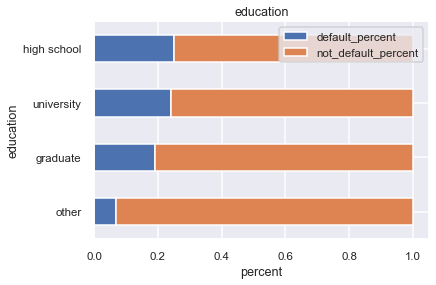

In [150]:
plt.figure(figsize=(12,6))
sns.set_context('talk',font_scale=0.7)
edu=edu_pet.plot(x='education',kind='barh',stacked=True,title='education')
edu.set_xlabel('percent')
edu.set_yticklabels(['other','graduate','university','high school'])

[Text(0, 0, 'marriage'), Text(0, 0, 'single'), Text(0, 0, 'other')]

<Figure size 864x432 with 0 Axes>

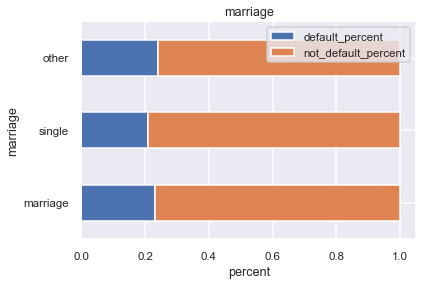

In [151]:
plt.figure(figsize=(12,6))
sns.set_context('talk',font_scale=0.7)
mar=mar_pet.plot(x='marriage',kind='barh',stacked=True,title='marriage')
mar.set_xlabel('percent')
mar.set_yticklabels(['marriage','single','other'])

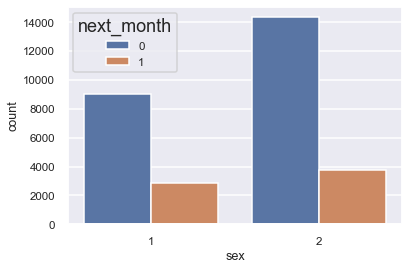

In [152]:
sns.countplot(x='sex',hue='next_month',data=df)

In [153]:
sex_0 =df.groupby(df['sex'][df['next_month']==0]).size().reset_index(name='not_default') 
sex_1 =df.groupby(df['sex'][df['next_month']==1]).size().reset_index(name='default') 
total2=df.groupby(df['sex']).size().reset_index(name='total')
sex_table = sex_0.join(sex_1['default']).join(total2['total'])
sex_table

,sex,not_default,default,total
0,1.0,9015,2873,11888
1,2.0,14349,3763,18112


In [154]:
sex_table['default_percent']=round(marriage_table['default']/marriage_table['total'],2)
sex_table['not_default_percent']=round(marriage_table['not_default']/marriage_table['total'],2)
sex_pet=sex_table.iloc[:,[0,4,5]]
sex_pet

,sex,default_percent,not_default_percent
0,1.0,0.23,0.77
1,2.0,0.21,0.79


**女性（優質客戶）的違約比例比例，男性的違約比例反而較高**

In [155]:
print('age'+str(sorted(df['age'].unique())))

def agee(x):
    if x >=20 and x<30:
        return '20-29'
    if x >=30 and x <40:
        return '30-39'
    if x >=40 and x <50:
        return '40-49'
    if x >=50 and x <60:
        return '50-59'
    if x >=60 and x <70:
        return '60-69'
    else:
        return '70-79'

age[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]


In [156]:
df['age_range'] = df['age'].apply(agee)

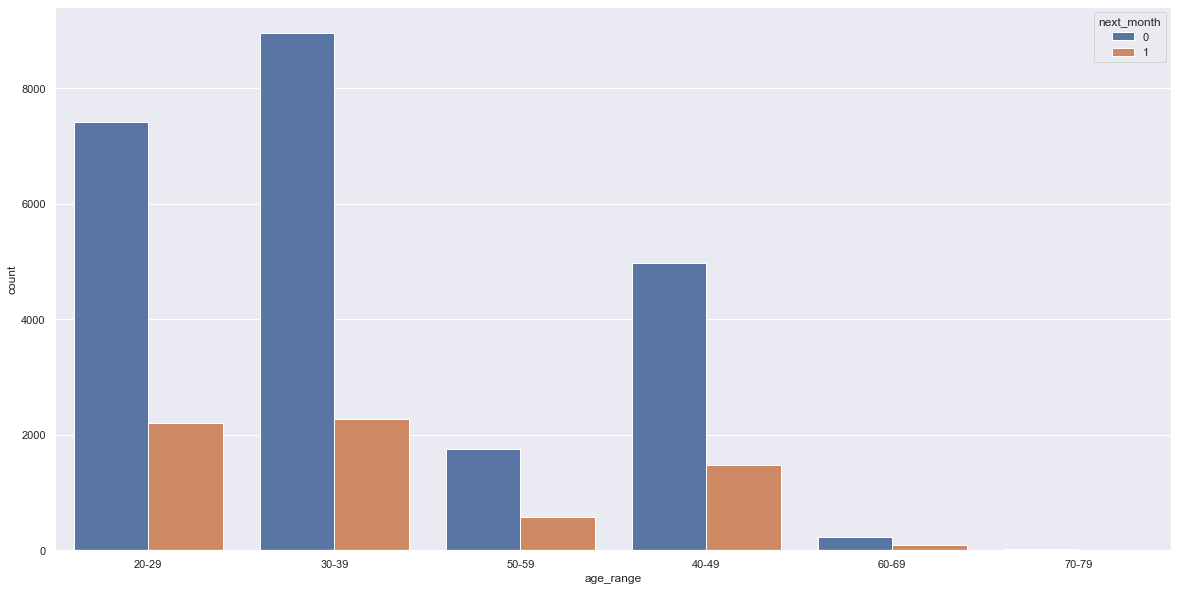

In [157]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='age_range',hue='next_month',data=df)

In [158]:
age_0=df.groupby(df['age_range'][df['next_month']==0]).size().reset_index(name='not default')
age_1=df.groupby(df['age_range'][df['next_month']==1]).size().reset_index(name='default')
age_2=df.groupby(df['age_range']).size().reset_index(name='total')
age=age_0.join(age_1.set_index('age_range'),on='age_range').join(age_2.set_index('age_range'),on='age_range')
age

,age_range,not default,default,total
0,20-29,7421,2197,9618
1,30-39,8962,2276,11238
2,40-49,4979,1485,6464
3,50-59,1759,582,2341
4,60-69,225,89,314
5,70-79,18,7,25


In [159]:
age['not_default_percent(%)']=round(age['not default']/age['total']*100,2)
age['default_percent(%)']=round(age['default']/age['total']*100,2)
age_def=age.iloc[:,[0,4,5]]
age_def

,age_range,not_default_percent(%),default_percent(%)
0,20-29,77.16,22.84
1,30-39,79.75,20.25
2,40-49,77.03,22.97
3,50-59,75.14,24.86
4,60-69,71.66,28.34
5,70-79,72.00,28.00


**由此觀察得知年齡越高越容易欠款顯示未來應該要多注意高年齡層的還款狀況或許是因為家庭壓力導致還款能力越來越大**

In [160]:
def limit(x):
    if x >=0 and x<50000:
        return '0-50000'
    if x >=50000 and x <100000:
        return '50000-100000'
    if x >=100000 and x <150000:
        return '100000-150000'
    if x >=150000 and x <200000:
        return '150000-200000'
    if x >=200000 and x <250000:
        return '200000-250000'
    else:
        return 'above 250000'

In [161]:
df['limit_range'] = df['limit_bal'].apply(limit)

In [162]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,next_month,age_range,limit_range
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20-29,0-50000
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20-29,100000-150000
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39,50000-100000
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39,50000-100000
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59,50000-100000


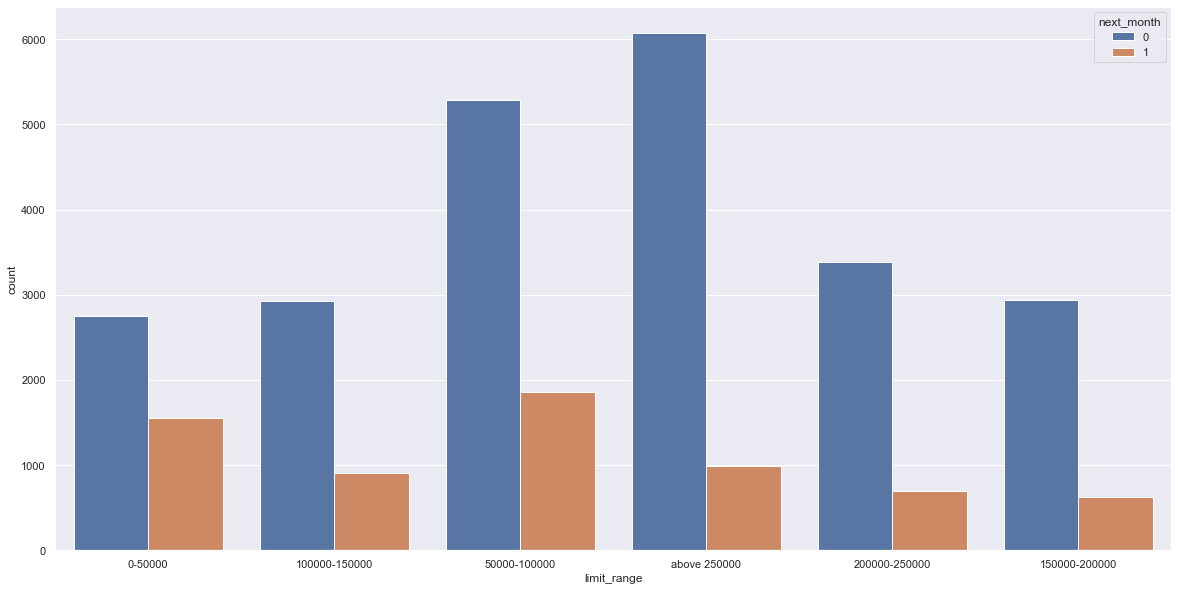

In [163]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='limit_range',hue='next_month',data=df)

In [164]:
limit_0=df.groupby(df['limit_range'][df['next_month']==0]).size().reset_index(name='not default')
limit_1=df.groupby(df['limit_range'][df['next_month']==1]).size().reset_index(name='default')
limit_2=df.groupby(df['limit_range']).size().reset_index(name='total')
limit=limit_0.join(limit_1.set_index('limit_range'),on='limit_range').join(limit_2.set_index('limit_range'),on='limit_range')
limit

,limit_range,not default,default,total
0,0-50000,2756,1555,4311
1,100000-150000,2930,910,3840
2,150000-200000,2933,627,3560
3,200000-250000,3384,699,4083
4,50000-100000,5282,1857,7139
5,above 250000,6079,988,7067


In [165]:
limit['not_default_percent(%)']=round(age['not default']/age['total']*100,2)
limit['default_percent(%)']=round(age['default']/age['total']*100,2)
limit_def=limit.iloc[:,[0,4,5]]
limit_def

,limit_range,not_default_percent(%),default_percent(%)
0,0-50000,77.16,22.84
1,100000-150000,79.75,20.25
2,150000-200000,77.03,22.97
3,200000-250000,75.14,24.86
4,50000-100000,71.66,28.34
5,above 250000,72.00,28.00


In [166]:
sex_marriage = df[df['next_month']==1].groupby([df['marriage'],df['sex']]).size().unstack()
sex_marriage.rename(index={1:"marriage",2:"single",3:"other"} ,columns={1:"boy",2:"girl"} , inplace=True)
sex_marriage


sex,boy,girl
marriage,,
marriage,1346,1860
single,1485,1856
other,42,47


In [167]:
sex_marriage['total']=sex_marriage['boy']+sex_marriage['girl']
sex_marriage['boy_percent']=sex_marriage['boy']/sex_marriage['total']
sex_marriage['girl_percent']=sex_marriage['girl']/sex_marriage['total']
sex_marriage

sex,boy,girl,total,boy_percent,girl_percent
marriage,,,,,
marriage,1346,1860,3206,0.419838,0.580162
single,1485,1856,3341,0.444478,0.555522
other,42,47,89,0.471910,0.528090


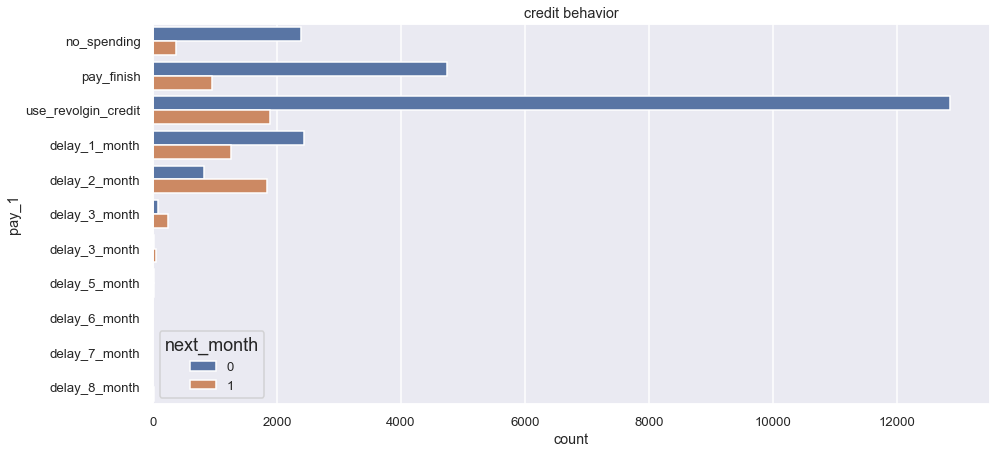

In [168]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="pay_1", hue='next_month', data=df)
pay1.set_yticklabels(['no_spending','pay_finish','use_revolgin_credit','delay_1_month','delay_2_month'
                   ,'delay_3_month','delay_3_month','delay_5_month','delay_6_month','delay_7_month','delay_8_month'])
pay1.set_title('credit behavior')

plt.show()

In [169]:
delay_1 = df.groupby(df['pay_1'][df['next_month'] == 0]).size().reset_index(name='not_default')
delay_2 = df.groupby(df['pay_1'][df['next_month'] == 1]).size().reset_index(name='default')
total = df.groupby('pay_1').size().reset_index(name='total')

pay_1_table = delay_1.join(delay_2['default']).join(total['total'])
pay_1_table['pay_1'] = ['no_spending','pay_finish','use_revolgin_credit','delay_1_month','delay_2_month'
                   ,'delay_3_month','delay_3_month','delay_5_month','delay_6_month','delay_7_month','delay_8_month']

pay_1_table

,pay_1,not_default,default,total
0,no_spending,2394,365,2759
1,pay_finish,4732,954,5686
2,use_revolgin_credit,12849,1888,14737
3,delay_1_month,2436,1252,3688
4,delay_2_month,823,1844,2667
5,delay_3_month,78,244,322
6,delay_3_month,24,52,76
7,delay_5_month,13,13,26
8,delay_6_month,5,6,11
9,delay_7_month,2,7,9


In [170]:
pay_1_table['default'] = round((delay_2['default']/total['total'])*100,2)
pay_1_table['not_default'] = round((delay_1['not_default']/total['total'])*100,2)



In [171]:
pay_1_pct = pay_1_table.iloc[:,0:3]
pay_1_pct = pay_1_pct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

pay_1_pct

,pay_1,not_default,default
0,no_spending,86.77,13.23
1,pay_finish,83.22,16.78
2,use_revolgin_credit,87.19,12.81
3,delay_1_month,66.05,33.95
4,delay_2_month,30.86,69.14
5,delay_3_month,24.22,75.78
6,delay_3_month,31.58,68.42
7,delay_5_month,50.00,50.00
8,delay_6_month,45.45,54.55
9,delay_7_month,22.22,77.78


Text(0.5, 0, 'percent')

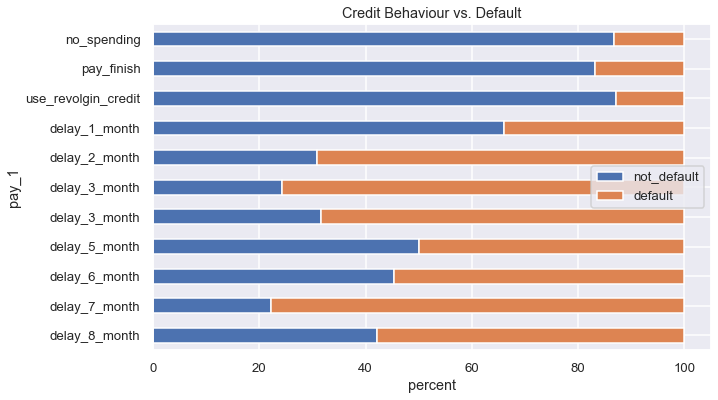

In [172]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context('talk',font_scale=0.8)
ax = pay_1_pct.sort_index(ascending=False).plot(x='pay_1', kind='barh', stacked=True, title='Credit Behaviour vs. Default')
ax.set_xlabel('percent')

**觀察到延期付款後違約機率開始大增，尤其從2個月開始違約比率大的誇張幾乎都高於50%**

**總結，pay1-pay6與違約相關係數較大顯是這部分每位消費者的此狀況需要注意**

**尤其延遲付款超過2個月，違約機率大增是否後續就需要馬上先暫付信用卡功能需要討論**

**離婚違約者與女性和高中生皆有更大的違約機率，未來若類似消費者辦卡需要謹慎給予花費額度**

**20-40尚未結婚年齡層消費潛力較大可針對此族群給予更多優惠活動刺激買氣**

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   limit_bal    30000 non-null  float64
 2   sex          30000 non-null  int64  
 3   education    30000 non-null  int64  
 4   marriage     30000 non-null  int64  
 5   age          30000 non-null  int64  
 6   pay_1        30000 non-null  int64  
 7   pay_2        30000 non-null  int64  
 8   pay_3        30000 non-null  int64  
 9   pay_4        30000 non-null  int64  
 10  pay_5        30000 non-null  int64  
 11  pay_6        30000 non-null  int64  
 12  bill_amt1    30000 non-null  float64
 13  bill_amt2    30000 non-null  float64
 14  bill_amt3    30000 non-null  float64
 15  bill_amt4    30000 non-null  float64
 16  bill_amt5    30000 non-null  float64
 17  bill_amt6    30000 non-null  float64
 18  pay_amt1     30000 non-null  float64
 19  pay_

In [174]:
education_df = pd.get_dummies(df['education'],prefix='education')

In [175]:
education_df

,education_0,education_1,education_2,education_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
29995,0,0,0,1
29996,0,0,0,1
29997,0,0,1,0
29998,0,0,0,1


In [176]:
df = pd.concat([df,education_df],axis=1)

In [177]:
marriage_df = pd.get_dummies(df['marriage'],prefix='marriage')

In [178]:
df = pd.concat([df,marriage_df],axis=1)

In [179]:
age_df = pd.get_dummies(df['age_range'],prefix='age_range')
df = pd.concat([df,age_df],axis=1)


In [180]:
limit_df = pd.get_dummies(df['limit_range'],prefix='limit_range')
df = pd.concat([df,limit_df],axis=1)

In [181]:
df2=df.copy()

In [185]:
def sex_x (x):
    if x==1:
        return 0
    if x==2:
        return 1
df2['sex']=df2['sex'].apply(sex_x)

In [187]:
df2.drop(['marriage','education','limit_range','age_range'],axis=1,inplace=True)

In [189]:
df3=df2.copy()
#嘗試兩種方式進行測試
#第一種根據目前相關係數找出正相關係數的指標將這些指標做模型的預測
df3corr= df3.corr()

In [190]:
print(df3corr['next_month'].sort_values(ascending=False))

next_month                   1.000000
pay_1                        0.324794
pay_2                        0.263551
pay_3                        0.235253
pay_4                        0.216614
pay_5                        0.204149
pay_6                        0.186866
limit_range_0-50000          0.137689
limit_range_50000-100000     0.052401
education_2                  0.036467
education_3                  0.032403
marriage_1                   0.029775
age_range_50-59              0.019214
age_range_60-69              0.015422
limit_range_100000-150000    0.014565
age                          0.013890
age_range_20-29              0.011959
age_range_40-49              0.010775
age_range_70-79              0.004091
marriage_3                   0.004043
bill_amt6                   -0.005372
bill_amt5                   -0.006760
bill_amt4                   -0.010156
id                          -0.013952
bill_amt3                   -0.014076
bill_amt2                   -0.014193
bill_amt1   

In [191]:
from sklearn.model_selection import train_test_split
x= df3.drop(['next_month'],axis=1)
y=df3['next_month']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=29)

In [193]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150,max_depth=15,min_samples_split=3,min_samples_leaf=3,max_features=10)

model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=15, max_features=10, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=150)

In [194]:
model.score(xtest,ytest)

0.8185555555555556

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_samples_leaf':range(2,20,2),
 'max_features':range(3,10,1),
'n_estimators':range(100,200,10)
}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(), 
param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=2)
gsearch1.fit(xtrain,ytrain)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\austin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 3,
  'max_features': 7,
  'min_samples_leaf': 10,
  'n_estimators': 130},
 0.8212380952380953)

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=29)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [228]:

model2 = GradientBoostingClassifier(n_estimators=130,max_depth=3,min_samples_leaf=10,max_features=7)

model2.fit(xtrain,ytrain)

GradientBoostingClassifier(max_features=7, min_samples_leaf=10,
                           n_estimators=130)

In [229]:
score = model2.score(xtest, ytest)
print ("準確率:%.2f%%" % (score * 100))

準確率:82.01%


In [230]:
!pip install pymysql

In [231]:
import pymysql


In [233]:
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='gg9881234', db= 'pratice', charset='utf8')


In [243]:
cursor = conn.cursor()

In [270]:
sql=("SELECT * FROM pratice.1194_players")

cursor.execute(sql)

9

In [272]:
results = cursor.fetchall()

In [303]:
def convert2Dataframe(data):
    df10=pd.DataFrame(list(data),columns=["id1","id2"])
    print(df10)

In [307]:
df10 = pd.DataFrame(results,columns=['id1','id2'])

In [308]:
df10

,id1,id2
0,10,2
1,15,1
2,20,3
3,25,1
4,30,1
5,35,2
6,40,3
7,45,1
8,50,2


In [309]:
conn.close()

In [310]:
df10

,id1,id2
0,10,2
1,15,1
2,20,3
3,25,1
4,30,1
5,35,2
6,40,3
7,45,1
8,50,2
